In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Load the experiment results
f = np.load('../output/mnist_1vs7_inputcheck_results.npz')
orig_results = f['orig_results']
flipped_results = f['flipped_results']
fixed_influence_loo_results = f['fixed_influence_loo_results']
fixed_loss_results = f['fixed_loss_results']
fixed_random_results = f['fixed_random_results']
fixed_ours_results = f['fixed_ours_results']

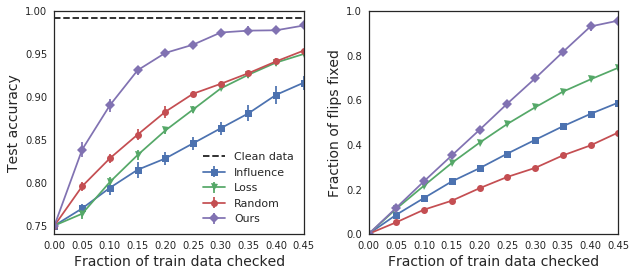

In [25]:
sns.set_style('white')
fontsize=14

x = np.arange(0, 0.5, 0.05)
metric_idx = 0

fig, axs = plt.subplots(1,2, figsize=(9, 4))
num_train_examples = 2000
num_flips = int(num_train_examples / 20) * (7 + 1)  

flip_mean = np.mean(flipped_results, axis=0)
flip_error = np.std(flipped_results, axis=0) / np.sqrt(flipped_results.shape[0])

markers = ['s', 'v', 'o', 'D']

for ax, metric_idx in zip(axs, [2, 0]):
    count = 0
    for results, label in [
        (fixed_influence_loo_results, 'Influence'),
        (fixed_loss_results, 'Loss'), 
        (fixed_random_results, 'Random'),
        (fixed_ours_results, 'Ours')]:
                    
        mean = np.mean(results, axis=1)[:, metric_idx]
        error = np.std(results, axis=1)[:, metric_idx] / np.sqrt(results.shape[1])
        mean = np.insert(mean, 0, flip_mean[metric_idx]) 
        error = np.insert(error, 0, flip_error[metric_idx])
        
        if metric_idx == 0:
            # proportion of fixed
            mean /= num_flips
            error /= num_flips
            
        ax.errorbar(x, mean, error, label=label, marker=markers[count])
        ax.set_xlim((0, 0.45))
        ax.set_xticks(x)
        ax.set_xlabel('Fraction of train data checked', fontsize=fontsize)
        count+=1
        
    if metric_idx > 0:
        ax.plot(
            x, 
            [orig_results[metric_idx - 1]] * len(x),
            '--',
            color='k',
            label='Clean data')
        ax.legend(loc='best', fontsize=fontsize-3)          
        ax.set_ylim((0.74, 1))
        ax.set_ylabel('Test accuracy', fontsize=fontsize)
    else:
        ax.set_ylim((0, 1))
        ax.set_ylabel('Fraction of flips fixed', fontsize=fontsize)
plt.tight_layout()
plt.savefig('labelfix.png', dpi=300)
